In [1]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import svm
import math
from nltk.collocations import *
from nltk import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import *
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
df_train = pd.read_csv('../data/train_set.tsv', sep='\t')

df_test = pd.read_csv('../data/test_set.tsv', sep='\t')



In [3]:
df_train

,Id,Title,Content,Category
0,1034,"Rover deal 'may cost 2,000 jobs'","Some 2,000 jobs at MG Rover's Midlands plant m...",business
1,1008,India calls for fair trade rules,"India, which attends the G7 meeting of seven l...",business
2,5011,UK net users leading TV downloads,British TV viewers lead the trend of illegally...,tech
3,2034,Vera Drake scoops film award,Oscar hopefuls Mike Leigh and Imelda Staunton ...,entertainment
4,5172,Gadget show heralds MP3 Christmas,Partners of those who love their hi-tech gear ...,tech
...,...,...,...,...
1775,5265,Half of UK's mobiles 'go online',Multimedia mobile phones are finally showing s...,tech
1776,2213,TV show unites Angolan families,Angolan families who are attempting to track e...,entertainment
1777,2214,Volcano drama erupts on BBC One,"Supervolcano, a docu-drama about a volcanic er...",entertainment
1778,4322,Scotland v Italy (Sat),"Murrayfield, EdinburghSaturday, 26 February140...",sport


# Wordclouds

In [ ]:
cat_df = df_train.groupby('Category')['Content'].apply(lambda x: ''.join(x))


In [ ]:
text = cat_df['business']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['entertainment']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['politics']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['sport']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['tech']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Classification

### Tokenization of all articles' content, to use in classification methods

#### *Using Bag of Words*

In [4]:
vectorizer = CountVectorizer()

In [5]:
tokens = df_train.Content.values
X = vectorizer.fit_transform(tokens)
vectorizer.get_feature_names()
X = X.toarray()

In [6]:
test_tokens = df_test.Content.values
X_test = vectorizer.transform(test_tokens)
X_test = X_test.toarray()

#### *Using TF_IDF*

In [8]:
vectorizer2 = TfidfVectorizer(ngram_range=(1,1), stop_words= STOPWORDS)
Z = vectorizer2.fit_transform(tokens)

In [9]:
Z_test = vectorizer2.transform(test_tokens)
Z_test = Z_test.toarray()

In [10]:
train_categories = df_train.Category.values
test_categories = df_test.Category.values

## *Classification Method:* Support Vector Machine

In [28]:
# parameters = {'kernel':('linear', 'rbf'), 'C':[1.0], 'gamma':'auto'}

clf = svm.SVC(kernel = 'linear')
clf.fit(X, y = train_categories)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
print(clf.predict(X_test[127].reshape(1, -1)))

['sport']


## *Classification Method:* Naive Bayes
### *Multinomial NB*

#### Applying on X (BoW)

In [11]:
clf = MultinomialNB()
blah = clf.fit(X, y = train_categories)

In [12]:
print(clf.predict(X_test[301].reshape(1,-1)))

['business']


#### Applying on Z (TF-IDF)

In [39]:
clf2 = MultinomialNB()
clf2.fit(Z, y = train_categories)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
print(clf2.predict(Z_test[200].reshape(1,-1)))

['politics']


### *Cross Validation*

In [33]:
score_metrics = ['f1_macro', 'precision_macro','recall_macro', 'accuracy']

In [34]:
validation1 = cross_validate(estimator = clf, X = X_test, y = test_categories, scoring = score_metrics, cv = 10, n_jobs = 6)
validation1

{'fit_time': array([0.67502522, 0.7366848 , 0.53188348, 0.68081284, 0.5184052 ,
        0.87292075, 0.67526293, 0.59530592, 0.51292276, 0.52304673]),
 'score_time': array([0.12837601, 0.10145712, 0.10318923, 0.09302187, 0.1046474 ,
        0.07778931, 0.02234674, 0.01989126, 0.01667094, 0.01502824]),
 'test_f1_macro': array([0.97770898, 0.94913755, 0.97408907, 0.97871148, 0.93055556,
        0.97490196, 0.91284271, 0.83226721, 0.92691533, 0.92079293]),
 'test_precision_macro': array([0.97777778, 0.95777778, 0.98      , 0.97777778, 0.935     ,
        0.97777778, 0.93846154, 0.87878788, 0.93777778, 0.93737374]),
 'test_recall_macro': array([0.98      , 0.95      , 0.97142857, 0.98181818, 0.935     ,
        0.975     , 0.91      , 0.845     , 0.93      , 0.925     ]),
 'test_accuracy': array([0.97777778, 0.95555556, 0.97777778, 0.97777778, 0.93333333,
        0.97777778, 0.91111111, 0.84090909, 0.93181818, 0.93181818])}

In [35]:
validation2 = cross_validate(estimator = clf2, X = Z_test, y = test_categories, scoring = score_metrics, cv = 10, n_jobs = 6)
validation2

{'fit_time': array([0.26406002, 0.24837255, 0.38090014, 0.32581949, 0.32891202,
        0.24968147, 0.16857433, 0.22976828, 0.18929052, 0.17387009]),
 'score_time': array([0.02483582, 0.02008414, 0.03322482, 0.02925944, 0.03108478,
        0.02106929, 0.01807356, 0.01613975, 0.01769471, 0.01415658]),
 'test_f1_macro': array([0.93038961, 0.97714286, 0.95306259, 0.93263988, 0.97490196,
        0.97714286, 0.93233083, 0.8554568 , 0.93038961, 0.8916221 ]),
 'test_precision_macro': array([0.94848485, 0.98181818, 0.96515152, 0.95      , 0.97777778,
        0.98181818, 0.94363636, 0.8760101 , 0.94848485, 0.92222222]),
 'test_recall_macro': array([0.925     , 0.975     , 0.94642857, 0.92420635, 0.975     ,
        0.975     , 0.93      , 0.855     , 0.925     , 0.9       ]),
 'test_accuracy': array([0.93333333, 0.97777778, 0.95555556, 0.93333333, 0.97777778,
        0.97777778, 0.93333333, 0.86363636, 0.93181818, 0.90909091])}

In [13]:
labels = ['business','politics', 'entertainment', 'sport', 'tech']
y_train = label_binarize(train_categories, classes = labels)
y_test = label_binarize(test_categories, classes = labels)

In [15]:
classifier = OneVsRestClassifier(clf)

In [16]:
# classifier = OneVsRestClassifier(clf2)
y_score = classifier.fit(X, train_categories).predict_proba(X_test)

In [17]:
y_score

array([[8.10607849e-12, 4.45195230e-58, 1.00000000e+00, 6.74296414e-82,
        7.72064293e-75],
       [5.90468503e-45, 1.00000000e+00, 2.68799375e-47, 1.04455086e-46,
        4.30975501e-41],
       [1.00000000e+00, 7.12728244e-68, 2.76175816e-24, 8.18199412e-43,
        6.23963026e-20],
       ...,
       [1.00000000e+00, 1.15235549e-21, 5.43646791e-23, 2.25173410e-33,
        1.39687696e-26],
       [3.01369403e-01, 1.93074052e-72, 6.98630597e-01, 1.66037429e-90,
        4.89002026e-53],
       [6.46111532e-42, 1.00000000e+00, 3.97784505e-65, 2.39461677e-55,
        5.25021532e-52]])

In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

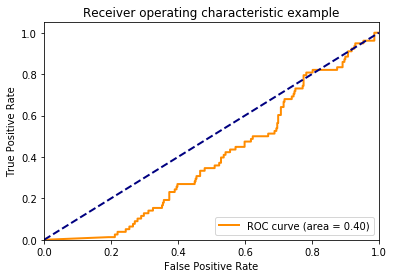

In [19]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()